# Histograms can be Misleading

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from KDEpy import NaiveKDE, FFTKDE
from astroquery.sdss import SDSS

# values range from 15 -> 55
test_data = [20.13, 19.94, 20.03, 20.06, 20.04, 19.98, 20.15, 19.99, 20.20, 19.99, 20.13, 20.22, 19.86, 19.97, 
19.98, 20.06, 29.97, 29.73, 29.75, 30.13, 29.96, 29.82, 29.98, 30.12, 30.18, 29.95, 29.97, 29.82, 30.04, 29.93, 
30.04, 30.07, 40.10, 39.93, 40.05, 39.82, 39.92, 39.91, 39.75, 40.00, 40.02, 39.96, 40.07, 39.92, 39.86, 40.04, 
39.91, 40.14, 49.95, 50.06, 50.03, 49.92, 50.15, 50.06, 50.00, 50.02, 50.06, 50.00, 49.70, 50.02, 49.96, 50.01, 
50.05, 50.13]

fake_data = [18, 19, 21, 22, 38, 39, 41, 42, 53, 54, 56, 57]  

small_data = [1, 4, 5, 8]

plt.rcParams["figure.figsize"] = (8,8)


def get_silverman_bandwidth(data: list) -> float:
    """Get h value for creating a KDE

    Args:
        data (list): point data to create KDE of

    Returns:
        float: Ideal Bandwidth throgh Silverman algorithm
    """
    n = len(data)
    var = np.std(data) ** 2
    iqr = np.quantile(data, 0.75) - np.quantile(data, 0.25)
    m = min(np.sqrt(var), iqr / 1.349)
    return 0.9 * m / n ** (1 / 5)


def get_kde(data: list, bandwidth: float) -> list:
    """Plot Kernel Density Estimation

    Args:
        data (list): Data to create KDE with
        bandwidth (float): bandwidth for each kernel

    Returns:
        tuple: 0: x-axis for plot, 1: KDE
    """
    x = np.linspace(min(data), max(data), len(data))
    kernels = [norm(xi, scale=bandwidth).pdf(x) for xi in data]
    return (x, sum(kernels) / len(data))


## Our choice of bin number & size can drastically impact how we view our data!

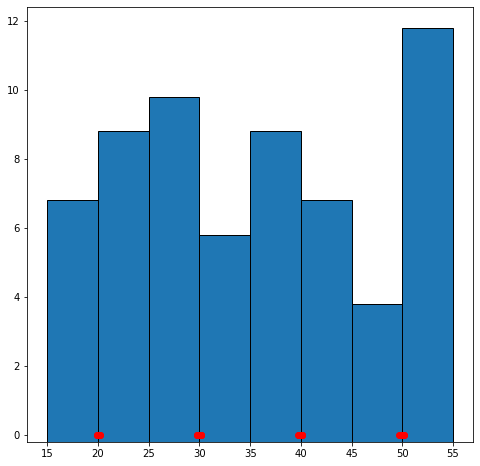

In [2]:
plt.hist(test_data, bins=[15,20,25,30,35,40,45,50,55], edgecolor="k", bottom=-.2)
plt.plot(test_data, np.full_like(test_data, 0), "or")
plt.show()

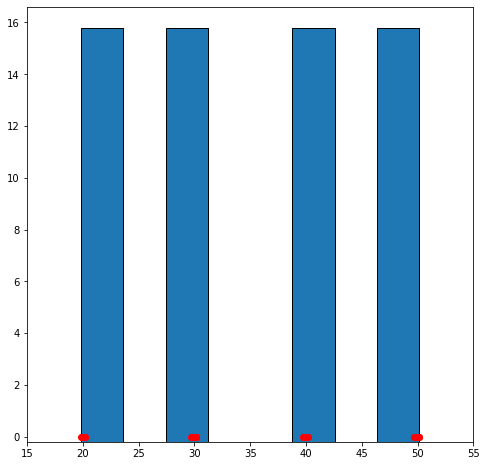

In [3]:
n, bins, patches = plt.hist(test_data, bins=8, edgecolor="k", bottom=-.2)
plt.plot(test_data, np.full_like(test_data, 0), "or")
plt.xlim(15,55)
plt.show()
# print(bins, "\n")
# print(np.linspace(min(test_data), max(test_data),8))

## Same thing with smaller dataset

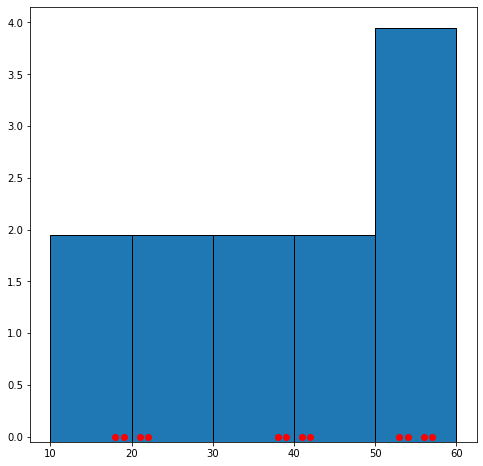

In [4]:
plt.hist(fake_data, bins=[10, 20, 30, 40, 50, 60], edgecolor="k", bottom=-0.05)
plt.plot(fake_data, np.full_like(fake_data, 0), "or", markeredgewidth=1)
plt.show()

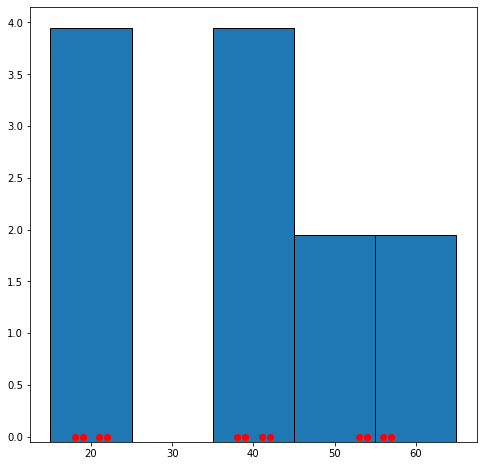

In [5]:
plt.hist(fake_data, bins=[15, 25, 35, 45, 55, 65], edgecolor="k", bottom=-0.05)
plt.plot(fake_data, np.full_like(fake_data, 0), "or", markeredgewidth=1)
plt.show()

## However, now with a smaller data set we can see that even with the correct distribution, the bin centers do not match the means of our distibutions

# Kernel Density Estimations fix these problems and give us a much more realistic approximation of our data's PDF

## We want to place a kernel function centered on each of our data points, then take the sum of all our kernel functions

### Typical Kernel Function [K(x)] Properties
- Non-negative everywhere: $K(x) > 0 \ \forall  x$ 
- Symmetric: $K(x) = K(-x) \ \forall  x$
- Decreasing: $K'(x) < 0 \ \forall  |x| > 0$

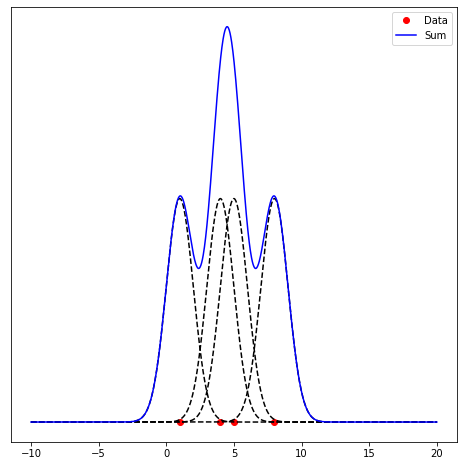

In [4]:
x = np.linspace(-10, 20, 1000)
kernels = [norm(xi).pdf(x) for xi in small_data]

plt.plot(small_data, np.full_like(small_data, 0), "or", markeredgewidth=1, label="Data")

for kernel in kernels:
    plt.plot(x, kernel, "--k")

kernel_density_estimate = sum(kernels)

plt.plot(x,kernel_density_estimate, "-b", label="Sum")
plt.legend()
plt.yticks([])
plt.show()

In [5]:
kernels

[array([2.11881925e-27, 2.94685472e-27, 4.09479245e-27, 5.68477675e-27,
        7.88502883e-27, 1.09270143e-26, 1.51289256e-26, 2.09277729e-26,
        2.89231969e-26, 3.99372288e-26, 5.50957260e-26, 7.59392401e-26,
        1.04573811e-25, 1.43875874e-25, 1.97770435e-25, 2.71608347e-25,
        3.72677531e-25, 5.10895007e-25, 6.99742833e-25, 9.57532694e-25,
        1.30911294e-24, 1.78817070e-24, 2.44033350e-24, 3.32734431e-24,
        4.53267579e-24, 6.16907318e-24, 8.38867828e-24, 1.13966053e-23,
        1.54691279e-23, 2.09780204e-23, 2.84231056e-23, 3.84757333e-23,
        5.20368065e-23, 7.03141478e-23, 9.49255564e-23, 1.28035953e-22,
        1.72539714e-22, 2.32302864e-22, 3.12484447e-22, 4.19962586e-22,
        5.63898770e-22, 7.56484520e-22, 1.01392842e-21, 1.35775965e-21,
        1.81654789e-21, 2.42817039e-21, 3.24279741e-21, 4.32681999e-21,
        5.76801246e-21, 7.68231136e-21, 1.02227084e-20, 1.35909054e-20,
        1.80525751e-20, 2.39573228e-20, 3.17647732e-20, 4.207862

## Different Kernel choices (and switching to kde package to make easier)

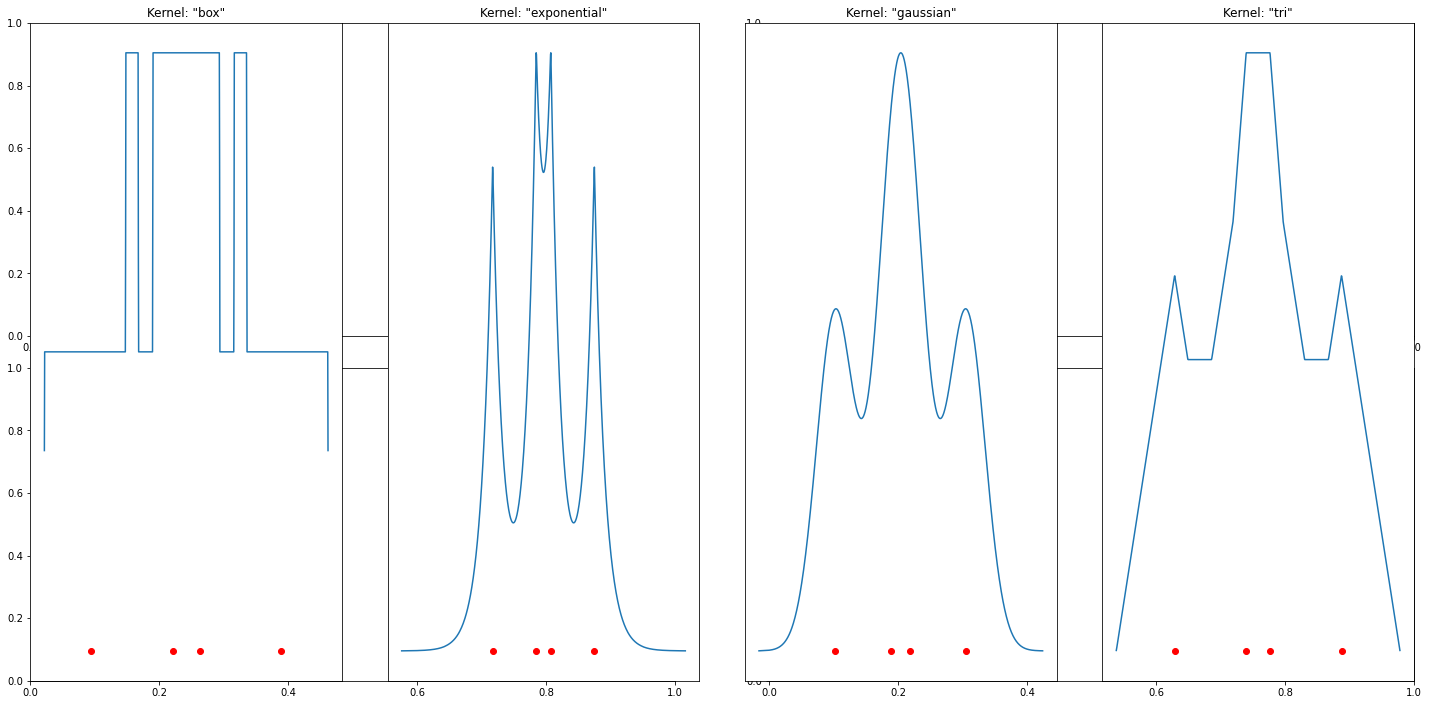

In [8]:
fig, axs = plt.subplots(2,2, figsize=(20,10))

for plt_num, kernel in enumerate(['box', 'exponential', 'gaussian', 'tri'], 1):

    ax = fig.add_subplot(1, 4, plt_num)
    ax.set_title(f'Kernel: "{kernel}"')
    x, y = FFTKDE(kernel=kernel, bw=1).fit(small_data).evaluate()
    ax.plot(x, y)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.plot(small_data, np.full_like(small_data, 0), "or")

fig.tight_layout()
plt.show()

## While these distributions appear very different, as the number of data points increases they all tend to the same distribution
## But more important than chosing a kernel function is chosing a "bandwidth"

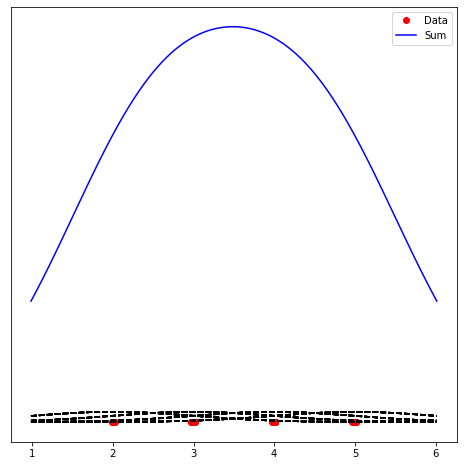

In [13]:
# Values range from 2->5
canvas_data = [2.013, 1.994, 2.003, 2.006, 2.004, 1.998, 2.015, 1.999, 2.020, 1.999, 2.013, 2.022, 1.986, 1.997, 
1.998, 2.006, 2.997, 2.973, 2.975, 3.013, 2.996, 2.982, 2.998, 3.012, 3.018, 2.995, 2.997, 2.982, 3.004, 2.993, 
3.004, 3.007, 4.010, 3.993, 4.005, 3.982, 3.992, 3.991, 3.975, 4.000, 4.002, 3.996, 4.007, 3.992, 3.986, 4.004, 
3.991, 4.014, 4.995, 5.006, 5.003, 4.992, 5.015, 5.006, 5.000, 5.002, 5.006, 5.000, 4.970, 5.002, 4.996, 5.001, 
5.005, 5.013]


x = np.linspace(min(canvas_data)-1, max(canvas_data)+1, 1000)
kernels = [norm(xi).pdf(x) for xi in canvas_data]

plt.plot(canvas_data, np.full_like(canvas_data, 0), "or", markeredgewidth=1, label="Data")

for kernel in kernels:
    plt.plot(x, kernel, "--k")

kernel_density_estimate = sum(kernels)

plt.plot(x, kernel_density_estimate, "-b", label="Sum")
plt.legend()
plt.yticks([])
plt.show()

## So far, all distributions have had a bandwidth of 1, but is there a better choice?

### Changing the bandwidth (h) means that we need to change our calculation a bit to keep the kde normalized (and giving us our standard equation)

## $$\hat{f}(x) = \frac{1}{Nh} \Sigma_{i=1}^{N} K(\frac{x-x_i}{h})$$

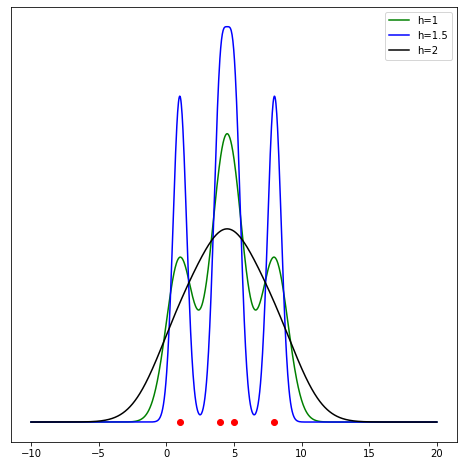

In [16]:
plt.plot(small_data, np.full_like(small_data, 0), "or", markeredgewidth=1)

h = 1
x = np.linspace(-10, 20, 1000)
kernels = [norm(xi, scale=h).pdf(x) for xi in small_data]

kernel_density_estimate = sum(kernels)/len(small_data)

plt.plot(x,kernel_density_estimate, "-g", label="h=1")

h = .5
x = np.linspace(-10, 20, 1000)
kernels = [norm(xi, scale=h).pdf(x) for xi in small_data]

kernel_density_estimate = sum(kernels) / len(small_data)

plt.plot(x,kernel_density_estimate, "-b", label="h=1.5")

h = 2
x = np.linspace(-10, 20, 1000)
kernels = [norm(xi, scale=h).pdf(x) for xi in small_data]

kernel_density_estimate = sum(kernels) / len(small_data)

plt.plot(x,kernel_density_estimate, "-k", label="h=2")

plt.legend()
plt.yticks([])
plt.show()

## But which choice of bandwidth is "correct"??

## Many different algorithms for finding an ideal bandwidth 

### Typically, the goal is to minimize the "Mean Integrated Square Error" [MISE(h)] (aka the "Risk Function" [$L^2$])

### $MISE(h) := E[\int{(\hat{f_h}(x) - f(x))^2} dx]$

### For gaussian functions, this term works out such that $h \approx 1.06\hat{\sigma} n^{-\frac{1}{5}}$
#### This is called Scott's Rule of Thumb

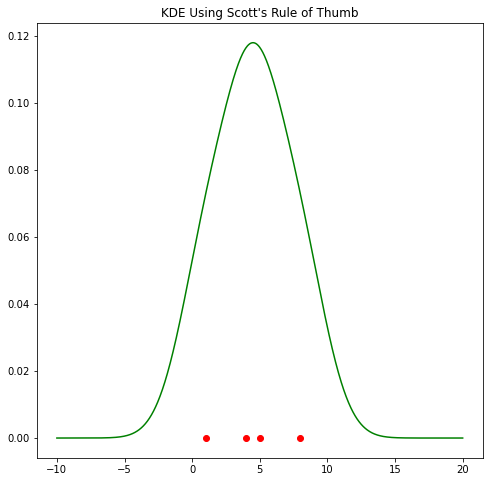

In [17]:
plt.plot(small_data, np.full_like(small_data, 0), "or", markeredgewidth=1)

n = len(small_data)
std = np.std(small_data)
h = 1.06*std*n**(-1/5)
x = np.linspace(-10, 20, 1000)
kernels = [norm(xi, scale=h).pdf(x) for xi in small_data]

kernel_density_estimate = sum(kernels)/len(small_data)

plt.plot(x,kernel_density_estimate, "-g")
plt.title("KDE Using Scott's Rule of Thumb")
plt.show()

### For many other distributions we can use Silverman's Rule of Thumb
### $$h = 0.9 * min(\hat{\sigma}, \frac{IQR}{1.349})n^{-\frac{1}{5}}$$
### However, this algorithm gives h values that are too large for multimodal data

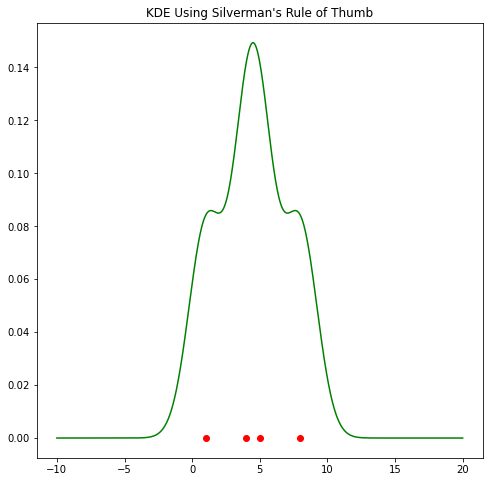

In [18]:
plt.plot(small_data, np.full_like(small_data, 0), "or", markeredgewidth=1)

n = len(small_data)
std = np.std(small_data)
iqr = np.quantile(small_data, .75) - np.quantile(small_data, .25)
m = min(std, iqr / 1.349)
h = 0.9 * m / n ** (1 / 5)
x = np.linspace(-10, 20, 1000)
kernels = [norm(xi, scale=h).pdf(x) for xi in small_data]

kernel_density_estimate = sum(kernels)/len(small_data)

plt.plot(x,kernel_density_estimate, "-g")
plt.title("KDE Using Silverman's Rule of Thumb")
plt.show()

### The "Improved Sheather Jones" (ISJ) algorithm is a relatively fast algorithm that is available in many frameworks that gives a good h value in most situations and works better for multimodal data than the silverman rule of thumb 

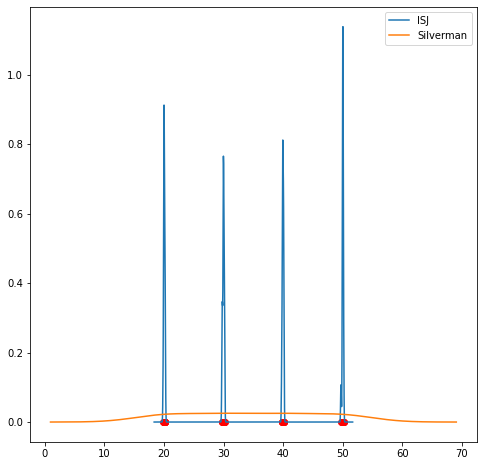

In [5]:
plt.plot(test_data, np.full_like(test_data, 0), "or")
x, y = FFTKDE(kernel='gaussian', bw='ISJ').fit(test_data).evaluate()
plt.plot(x, y, label="ISJ")
x, y = FFTKDE(kernel='gaussian', bw='silverman').fit(test_data).evaluate()
plt.plot(x, y, label="Silverman")
plt.legend()
plt.show()

## We can also weight our data

## $$\hat{f}(x) = \frac{1}{h} \Sigma_{i=1}^{N} w_i K(\frac{x-x_i}{h})  \ni  \Sigma_{i=1}^{N} w_i = 1$$

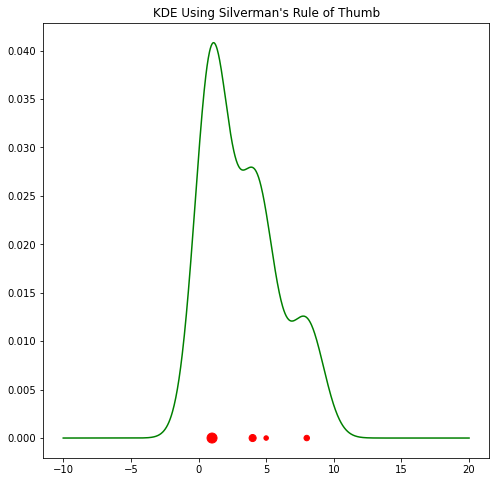

In [19]:
weights = np.array([.5, .25, .1, .15])

plt.scatter(small_data, [0,0,0,0], s=weights*200, c="r")

h = get_silverman_bandwidth(small_data)

x = np.linspace(-10, 20, 1000)
kernels = np.array([np.array(norm(xi, scale=h).pdf(x)) for xi in small_data])

weighted_kernels = [weights[i] * kernels[i] for i in range(len(kernels))]

kernel_density_estimate = sum(weighted_kernels)/len(small_data)

plt.plot(x,kernel_density_estimate, "-g")
plt.title("KDE Using Silverman's Rule of Thumb")
plt.show()

# Real Data from SDSS

In [47]:
from astroquery.sdss import SDSS

N = 2000
field = ["z", "ra", "dec"]

query = f"""
SELECT TOP {N}
    {field[0]}
FROM
    specObj
WHERE
    class = 'galaxy'  
    and zWarning = 0"""

data = np.array(SDSS.query_sql(query))
redshifts = [x[0] for x in data]

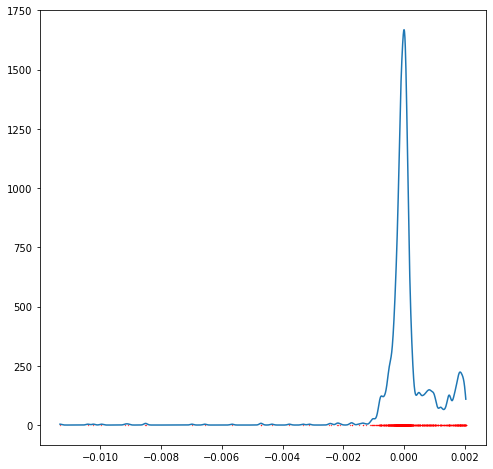

In [45]:
h = get_silverman_bandwidth(redshifts)
kde = get_kde(redshifts, h)

plt.scatter(redshifts, np.zeros_like(redshifts), c="r", s=.1)
plt.plot(kde[0], kde[1])
plt.show()